# Visualisations 3D de l'OA 1s(H)

#### But
Utiliser des bibliothèques `python` pour représenter une OA en 3D. Dans ce notebook, on travaille sur $1s(H)$, dont la symétrie sphérique facilite l'approche. 

#### Ressources

* fonction `numpy.random.choice()` : https://numpy.org/doc/stable/reference/random/generated/numpy.random.choice.html
* représentation 3D: https://jakevdp.github.io/PythonDataScienceHandbook/04.12-three-dimensional-plotting.html


#### Imports des librairies utiles et variables globales
Ne pas oublier de faire tourner cette cellule avant de lancer les cellules successives qui contiendront votre code...

In [2]:
import  numpy  as  np
import  matplotlib.pyplot  as  plt
#import random

a_0 = 52.9 #en pm, rayon de Bohr, variable globale    

L'expression de la fonction d'onde $\psi_{1s}=\psi_{1,0,0}(r,\theta,\phi)$ de l'OA $1s$ de l'atome H est le produit d'une fonction partie radiale et d'une fonction partie angluaire. 


$$\left\{ \begin{align} 
R_{1s}(r) = 2\, \left( \frac{1}{a_0} \right)^\tfrac{3}{2}  \exp{\left(-\frac{r}{a_0}\right)} \\
Y_{1s}(\theta,\varphi) = \frac{1}{\sqrt{4\pi}}
\end{align} \right. $$

$a_0 = 52,9\, pm$ est le **rayon de Bohr**. On remarquera que la fonction radiale est dimensionnée et que sa valeur dépend des unités retenues.




#### 1.a)
Il est parfois plus simple pour commencer de travailler en coordonnées cartésiennes $(x,y,z)$. Définir une fonction `prob_1s(x,y,z)` prenant en entrée les coordonnées cartésiennes d'un point et renvoyant la densité de probabilité de présence en ce point.

*Conseil* Vous pouvez avoir besoin de `np.sqrt()` pour exprimer $r$ en fonction de $(x,y,z)$.

#### 1.a) Votre réponse

In [3]:
#Densité de probabilité de présence 1s au point (x,y,z)

def prob_1s(x,y,z):
    r = np.sqrt(x**2+y**2+z**2) #r en fonction de x,y,z
    return np.square((1/a_0)**(3/2) * np.exp(-r/a_0)/np.sqrt(np.pi)) 

#listx = np.linspace(0,500,100)
#listprob = [prob_1s(i,0,0) for i in listx]
#plt.plot(listx,listprob)
#plt.show()

#### 1.b)
Créer à présent deux listes, `lpts` et `lproba`. La liste `lpts` est une liste de tuples(triplets) de points `(x,y,z)` équirépartis dans l'espace et `lproba` est la liste des valeurs de densité de probabilité de présence en ces points.

*Conseil*: soyez raisonnables sur le nombre de points dans ces listes, pour ne pas augmenter le temps d'exécution.


#### 1.b) Votre réponse

In [4]:
x = np.linspace(-20,20,50)
y = np.linspace(-20,20,50)
z = np.linspace(-20,20,50)
lpts = []
lproba = []
for ix in x:
    for iy in y:
        for iz in z:
            lpts.append((ix,iy,iz))
            lproba.append(prob_1s(ix,iy,iz))

Pour la suite, vous aurez besoin que votre liste de probabilités soit normalisée. Aussi on ajoute le code:

In [7]:
#La somme des probabilités est normalisée à 1
lproba = lproba/sum(lproba)

#### 1.c)
L'idée est à présent de tirer des points avec comme probabilité de tirage la densité de probabilité de présence en ce point. Ainsi, un point de l'espace a d'autant plus de chance d'être tiré que la densité de probabilité de présence y est élevée. 

On va dans un premier temps chercher uniquement à tirer l'index du tuples dans la liste `lpts`, avec l'idée que cet index étant également celui qui correspond à la probabilité dans la liste `lproba`, les listes ayant été construites dans la même boucle précédemment. 

Ecrire une fonction `selecpts` prenant en argument la liste des probabilité `lproba` et renvoyant une liste d'index `lindexptselec` des points sélectionnés.

*Conseil*: utiliser `numpy.random.choice()` en renseignant l'argument optionnel `p=`.
https://numpy.org/doc/stable/reference/random/generated/numpy.random.choice.html
*Astuce*: https://stackoverflow.com/questions/37265549/python-random-list-index-with-probability 
*Remarque*: vous pouvez utiliser toute autre méthode que celle suggérée, surtout si elle est plus élégante.

In [48]:
#extrait stackexchange pour vous aider
#Now, you said you wanted the index, not the element, so we can get the index like this:

#probabilities = [0.1, 0.2, 0.4, 0.2, 0.1]
#randomElement = np.random.choice(range(len(probabilities)), p=probabilities)
#print(randomElement)

In [8]:
def selecpts(lproba):
    lindexptselec = np.random.choice(range(len(lproba)), size = 10000, replace = True, p = lproba)
    return lindexptselec

#### 1.d)
Créer la liste des coordonnées `lcoord` des points tirés par selecpts, sous forme d'un array.

#### 1.d) Votre réponse:

In [9]:
#On génére la liste des index des points retenus
lindexptselec = selecpts(lproba)
#On va rechercher les coordonnées des points retenus
lcoord = []
for i in lindexptselec:
    lcoord.append(lpts[i])
lcoord = np.array(lcoord)/a_0
#print(lcoord)

#### 1.e)
C'est le moment de la représentation graphique! Malheureusement, sous notebook, la figure ne tournera pas (code à transposer sur python pour profiter de la vision en 3D).

*Astuces*: On rappelle que pour prendre toutes les coordonnées $x$ d'un array 2D, on peut écrire `lcoord[:,0]`.
*Documentation pour les figures 3D*: https://jakevdp.github.io/PythonDataScienceHandbook/04.12-three-dimensional-plotting.html et https://matplotlib.org/stable/gallery/mplot3d/scatter3d.html
#### 1.e) Votre réponse:

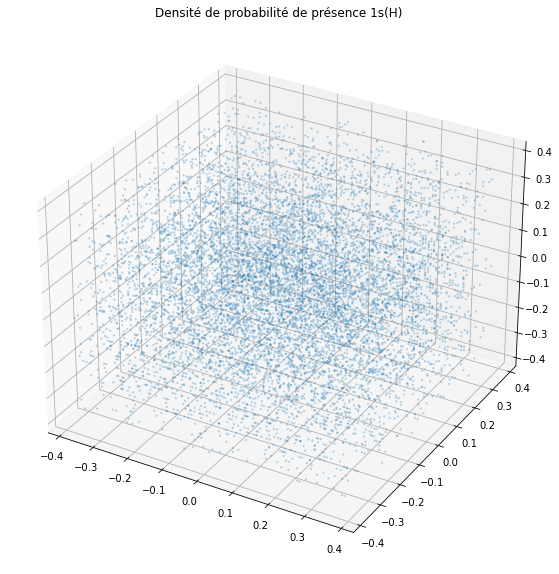

In [10]:

fig = plt.figure(figsize=(10,10))
ax = plt.axes(projection='3d')
#ax.scatter3D(lcoord[:,0],lcoord[:,1],lcoord[:,2], alpha=0.2)
ax.scatter(lcoord[:,0],lcoord[:,1],lcoord[:,2], alpha=0.2, s=2)
ax.set_title("Densité de probabilité de présence 1s(H)")
plt.show()